In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df0716_1216 = pd.read_csv('ticket_data/PRR_P000731_082418_070116_to_123116.csv')

df0117_0617 = pd.read_csv('ticket_data/PRR_P000731_082418_010117_to_0630017.csv')
df0717_1217 = pd.read_csv('ticket_data/PRR_P000731_082418_070117_to_1231017.csv')

df0110_0618 = pd.read_csv('ticket_data/PRR_P000731_082418_010118_to_0630018.csv')
df0718_0818 = pd.read_csv('ticket_data/PRR_P000731_082418_070118_to_083118.csv')

/Users/angellei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df0716_1216.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0117_0617.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0717_1217.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0110_0618.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0718_0818.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [5]:
park_ticket = pd.concat([df0716_1216, df0117_0617, df0717_1217, df0110_0618, df0718_0818])

In [6]:
new_parkticket = park_ticket.rename(index=str, columns={1: "Issue_Year", 2: "Ticket_Number", 3: "Tick_Issue_Date", 4: "Tick_Issue_Time", 5: "Agency",
                                                   6: "Tick_Badge_Issued", 7: "Veh_Make", 8:"Veh_Body", 9: "Tick_VIN", 10: "Tick_RP_State",
                                                   11: "Tick_RP_Plate", 12: "Plate_Exp_Date" , 13: "Violation", 14: "Violation_Desc", 15: "Tick_Meter",
                                                   16: "Tick_Street_No", 17: "Tick_Street_Name", 18: "Total_Paid", 19: "Total_Amt_Due"})

In [7]:
#convert to timestamp 
timestamp = new_parkticket['Tick_Issue_Date'].apply(lambda x : pd.Timestamp(x))

In [8]:
new_parkticket[new_parkticket['Tick_Issue_Time'] < '09:00'].head()

,Issue_Year,Ticket_Number,Tick_Issue_Date,Tick_Issue_Time,Agency,Tick_Badge_Issued,Veh_Make,Veh_Body,Tick_VIN,Tick_RP_State,Tick_RP_Plate,Plate_Exp_Date,Violation,Violation_Desc,Tick_Meter,Tick_Street_No,Tick_Street_Name,Total_Paid,Total_Amt_Due
0,2016,1002894970,07/01/2016,07:35,12.0,000038,FORD,NaN,NOT GIVEN,CA,56151T1,10/31/2016,TRC7.2.40,PRK PROHIB,NaN,1231.0,MARKET,$105,NaN
1,2016,1003836901,07/01/2016,06:30,1.0,001871,INFI,SU,0449,CA,6TLJ220,1/14/2016,TRC7.2.42,RESTRICTED,NaN,1001.0,POTRERO,$289,NaN
9,2016,1004180505,07/01/2016,07:08,1.0,000191,MERC,4D,5720,CA,7ARL780,12/18/2016,TRC7.2.40,PRK PROHIB,NaN,455.0,MARKET,$0,$226
19,2016,34866591T,07/01/2016,07:35,9.0,61,5517,IB,NaN,CA,NaN,NaN,TRC7.2.104B,MISUS CLPC,NaN,NaN,VAN NESS,$112,NaN
20,2016,34866602T,07/01/2016,07:52,9.0,61,5630,IB,NaN,CA,NaN,NaN,TRC7.2.104B,MISUS CLPC,NaN,NaN,SACRAMENTO,$0,$233


## EDA

In [7]:
new_parkticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895501 entries, 0 to 227032
Data columns (total 19 columns):
Issue_Year           int64
Ticket_Number        object
Tick_Issue_Date      object
Tick_Issue_Time      object
Agency               float64
Tick_Badge_Issued    object
Veh_Make             object
Veh_Body             object
Tick_VIN             object
Tick_RP_State        object
Tick_RP_Plate        object
Plate_Exp_Date       object
Violation            object
Violation_Desc       object
Tick_Meter           object
Tick_Street_No       float64
Tick_Street_Name     object
Total_Paid           object
Total_Amt_Due        object
dtypes: float64(2), int64(1), object(16)
memory usage: 441.8+ MB


In [8]:
new_parkticket.describe()

,Issue_Year,Agency,Tick_Street_No
count,2.895501e+06,2.895478e+06,2.770525e+06
mean,2.017085e+03,1.811023e+01,1.153145e+03
std,7.261350e-01,3.302258e+00,1.270135e+03
min,2.016000e+03,1.000000e+00,1.000000e+00
25%,2.017000e+03,1.900000e+01,2.780000e+02
50%,2.017000e+03,1.900000e+01,7.120000e+02
75%,2.018000e+03,1.900000e+01,1.715000e+03
max,2.018000e+03,8.600000e+01,9.999000e+04


In [9]:
sum(new_parkticket.Tick_RP_Plate.isnull()), sum(new_parkticket.Plate_Exp_Date.isnull()), sum(new_parkticket.Tick_Meter.isnull())

(99919, 449361, 2302013)

In [10]:
sum(new_parkticket.Tick_Street_Name.isnull()), sum(new_parkticket.Total_Paid.isnull()), sum(new_parkticket.Total_Amt_Due.isnull())

(7052, 1, 2380237)

In [11]:
new_parkticket.count()

Issue_Year           2895501
Ticket_Number        2895501
Tick_Issue_Date      2895501
Tick_Issue_Time      2893630
Agency               2895478
Tick_Badge_Issued    2895501
Veh_Make             2868119
Veh_Body             2842428
Tick_VIN             2793765
Tick_RP_State        2895501
Tick_RP_Plate        2795582
Plate_Exp_Date       2446140
Violation            2895501
Violation_Desc       2895501
Tick_Meter            593488
Tick_Street_No       2770525
Tick_Street_Name     2888449
Total_Paid           2895500
Total_Amt_Due         515264
dtype: int64

In [12]:
new_parkticket.corr()

,Issue_Year,Agency,Tick_Street_No
Issue_Year,1.000000,0.009456,0.005942
Agency,0.009456,1.000000,0.019480
Tick_Street_No,0.005942,0.019480,1.000000


## Quick Visualization

## Issue_Year

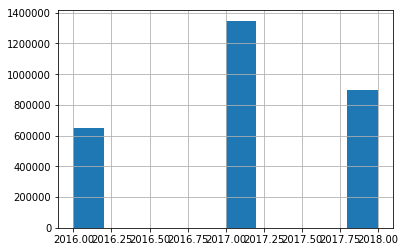

In [13]:
new_parkticket.Issue_Year.hist()

## Agency

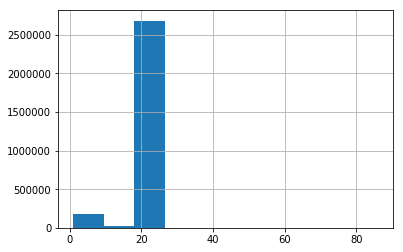

In [14]:
new_parkticket.Agency.hist()

## Ticket_Street_No

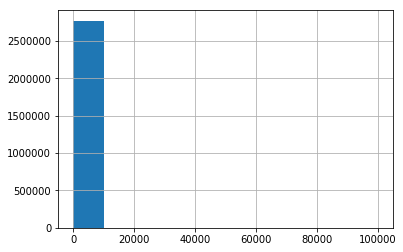

In [15]:
new_parkticket.Tick_Street_No.hist()

## Total tickets by Rush_hour Morning of day, by street name graph

In [16]:
#convert ticket time to hourly and assign a new column named 'Hour'
new_parkticket['Hour'] = (new_parkticket['Tick_Issue_Time'])[:1000].apply(lambda x: pd.to_datetime(x).hour)
new_parkticket['Hour'] = sorted(new_parkticket['Hour']) 
#new_ticket['Hour'] is a N dimenional Frame

In [17]:
re_new_ticket = new_parkticket.reset_index()
re_new_ticket['hour'] =re_new_ticket.Hour[(re_new_ticket.Hour == 7) | (re_new_ticket.Hour == 8) | (re_new_ticket.Hour == 9)]

In [18]:
#see if street_name is inside the bag of street_name, if yes, count the value, and convert it to a list
type_by_hour = re_new_ticket[re_new_ticket['Tick_Street_Name'].isin(re_new_ticket['Tick_Street_Name'].value_counts().index.tolist())]

#groupby street_name, then rush_hour
#count street_name after groupby
#unstack Rush_hour and if there's Na in hour, fill in with 0
pivot_df = type_by_hour.groupby(['Tick_Street_Name', 'hour'])['Tick_Street_Name'].count().unstack('hour').fillna(0)
idx = pivot_df.sum(1).sort_values(ascending=False).index
pivot_df = pivot_df.loc[idx]

Text(0, 0.5, 'number of tickets')

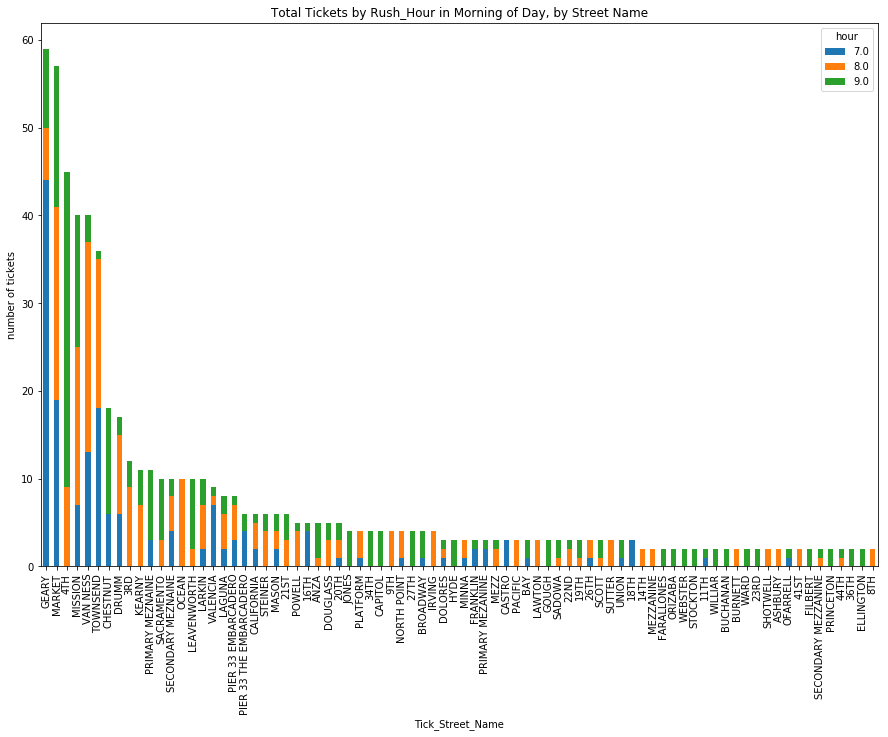

In [19]:
ax = pivot_df.iloc[:80].plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by Rush_Hour in Morning of Day, by Street Name')
plt.ylabel('number of tickets')

## Found out Geary Street got the most tickets in the monring rush hours. Maybe because there's more residential building near Geary street, and more buildings nearby. Also it indicates that Geary street has high traffic volume in the morning.

## Total tickets by Rush_hour Afternoon of day, by street name graph

In [20]:
new_parkticket['After_Hour'] = (new_parkticket['Tick_Issue_Time'])[:1000].apply(lambda x: pd.to_datetime(x).hour)
new_parkticket['After_Hour'] = sorted(new_parkticket['After_Hour']) 

In [21]:
re_new_ticket = new_parkticket.reset_index()
re_new_ticket['after_hour'] =re_new_ticket.After_Hour[(re_new_ticket.After_Hour == 16) | (re_new_ticket.After_Hour == 17) | (re_new_ticket.After_Hour == 18)]

Text(0, 0.5, 'number of tickets')

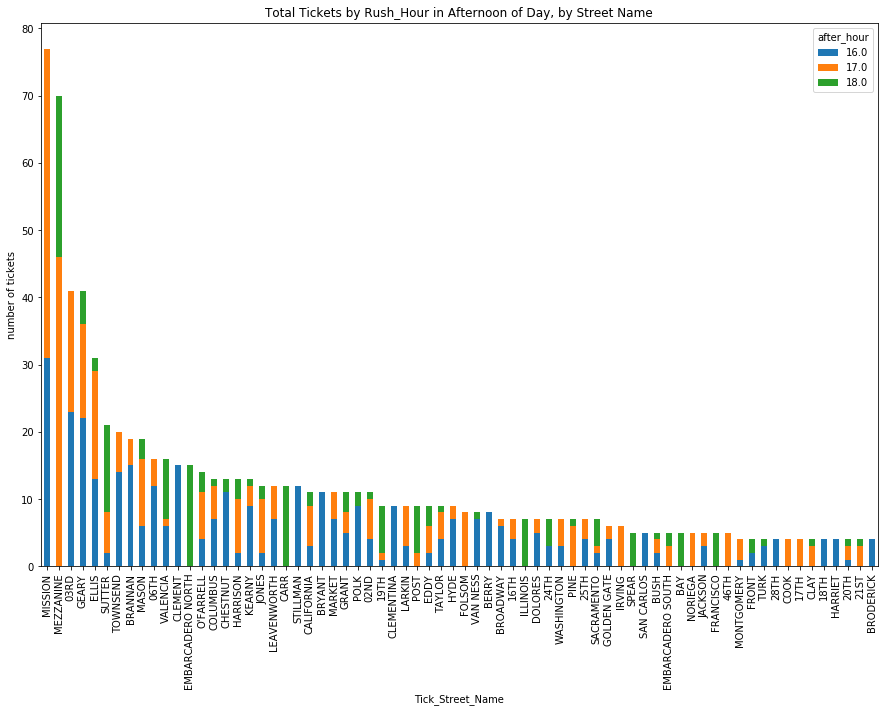

In [22]:
type_by_hour = re_new_ticket[re_new_ticket['Tick_Street_Name'].isin(re_new_ticket['Tick_Street_Name'].value_counts().index.tolist())]
pivot_df = type_by_hour.groupby(['Tick_Street_Name', 'after_hour'])['Tick_Street_Name'].count().unstack('after_hour').fillna(0)
idx = pivot_df.sum(1).sort_values(ascending=False).index
pivot_df = pivot_df.loc[idx]
ax = pivot_df.iloc[:70].plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by Rush_Hour in Afternoon of Day, by Street Name')
plt.ylabel('number of tickets')

## Total tickets by Rush_hour of all_day, by street name graph

In [23]:
new_parkticket['All_Hour'] = (new_parkticket['Tick_Issue_Time'])[:2000].apply(lambda x: pd.to_datetime(x).hour)
new_parkticket['All_Hour'] = sorted(new_parkticket['All_Hour']) 


Text(0, 0.5, 'number of tickets')

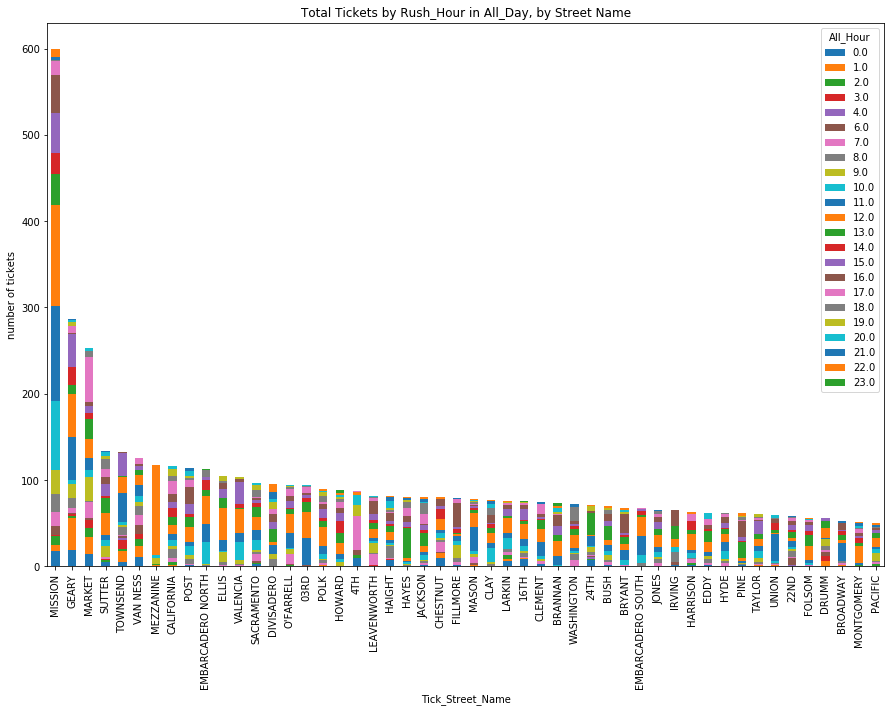

In [24]:
type_by_hour = new_parkticket[new_parkticket['Tick_Street_Name'].isin(new_parkticket['Tick_Street_Name'].
                                                                    value_counts().index.tolist())]
pivot_df = type_by_hour.groupby(['Tick_Street_Name', 'All_Hour'])['Tick_Street_Name'].count().unstack('All_Hour').fillna(0)
idx = pivot_df.sum(1).sort_values(ascending=False).index
pivot_df = pivot_df.loc[idx]
ax = pivot_df.iloc[:50].plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by Rush_Hour in All_Day, by Street Name')
plt.ylabel('number of tickets')

## Total tickets by Non_Rush_Hour of a day, by street name graph

In [25]:
new_parkticket['Non_Rush_hour'] = (new_parkticket['Tick_Issue_Time'])[:2000].apply(lambda x: pd.to_datetime(x).hour)
#new_ticket['Non_Rush_hour'] = sorted(new_ticket['Non_Rush_hour'])

In [26]:
re_new_ticket = new_parkticket.reset_index()
re_new_ticket['non_rush_hour'] =re_new_ticket.Non_Rush_hour[((re_new_ticket.Non_Rush_hour < 7) |
                                                    ((re_new_ticket.Non_Rush_hour >= 10) & (re_new_ticket.Non_Rush_hour <= 15)) |
                                                      (re_new_ticket.Non_Rush_hour >= 19))]

Text(0, 0.5, 'number of tickets')

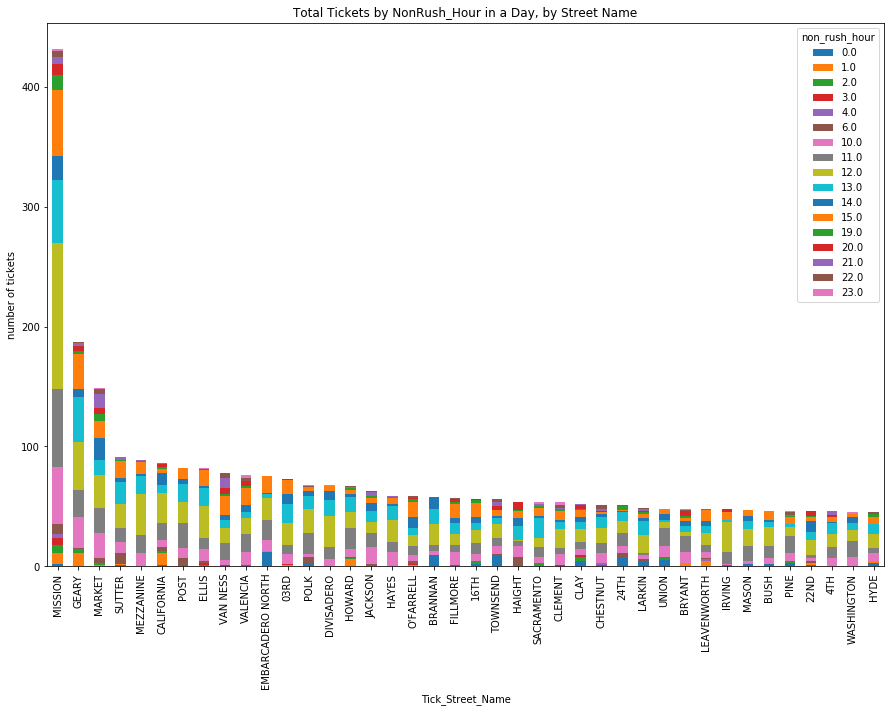

In [27]:
street_by_nonrush_hour = re_new_ticket[re_new_ticket['Tick_Street_Name'].isin(re_new_ticket['Tick_Street_Name'].value_counts().index.tolist())]
pivot_df = street_by_nonrush_hour.groupby(['Tick_Street_Name', 'non_rush_hour'])['Tick_Street_Name'].count().unstack('non_rush_hour').fillna(0)
idx = pivot_df.sum(1).sort_values(ascending=False).index
pivot_df = pivot_df.loc[idx]
ax = pivot_df.iloc[:40].plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by NonRush_Hour in a Day, by Street Name')
plt.ylabel('number of tickets')

## Total Tickets by Day, By Street Name

In [28]:
new_parkticket['Weekday'] = timestamp[:80000].dt.dayofweek
type_by_dow = new_parkticket[new_parkticket['Tick_Street_Name'].isin(new_parkticket['Tick_Street_Name'].value_counts()[:10].index.tolist())]
pivot_df = type_by_dow.groupby(['Weekday', 'Tick_Street_Name'])['Weekday'].count().unstack('Tick_Street_Name').fillna(0).reset_index()

Text(0, 0.5, 'number of tickets')

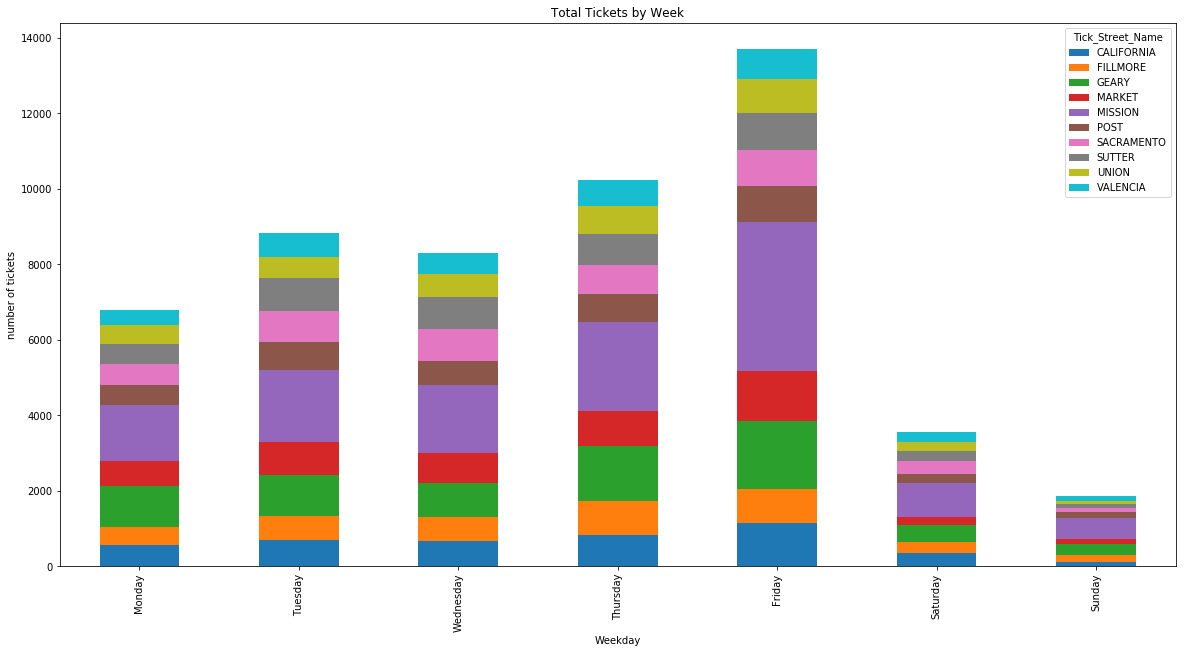

In [29]:
days = {6.0:'Sunday', 0.0:'Monday', 1.0:'Tuesday', 2.0:'Wednesday', 3.0:'Thursday', 4.0:'Friday', 5.0:'Saturday'}
pivot_df['Weekday'] = pivot_df['Weekday'].map(days)
pivot_df.plot( x= 'Weekday', kind = 'bar', figsize = (20, 10), stacked = True)
plt.title('Total Tickets by Week')
plt.ylabel('number of tickets')  

## Total Tickets by Month, By Street Name

In [30]:
#new column named month
new_parkticket['month'] = new_parkticket['Tick_Issue_Date'].apply(lambda x: pd.Timestamp(x).month)
type_by_dow = new_parkticket[new_parkticket['Tick_Street_Name'].isin(new_parkticket['Tick_Street_Name'].value_counts()[:10].index.tolist())]
pivot_df = type_by_dow.groupby(['month', 'Tick_Street_Name'])['month'].count().unstack('Tick_Street_Name').fillna(0).reset_index()

Text(0, 0.5, 'Number of tickets')

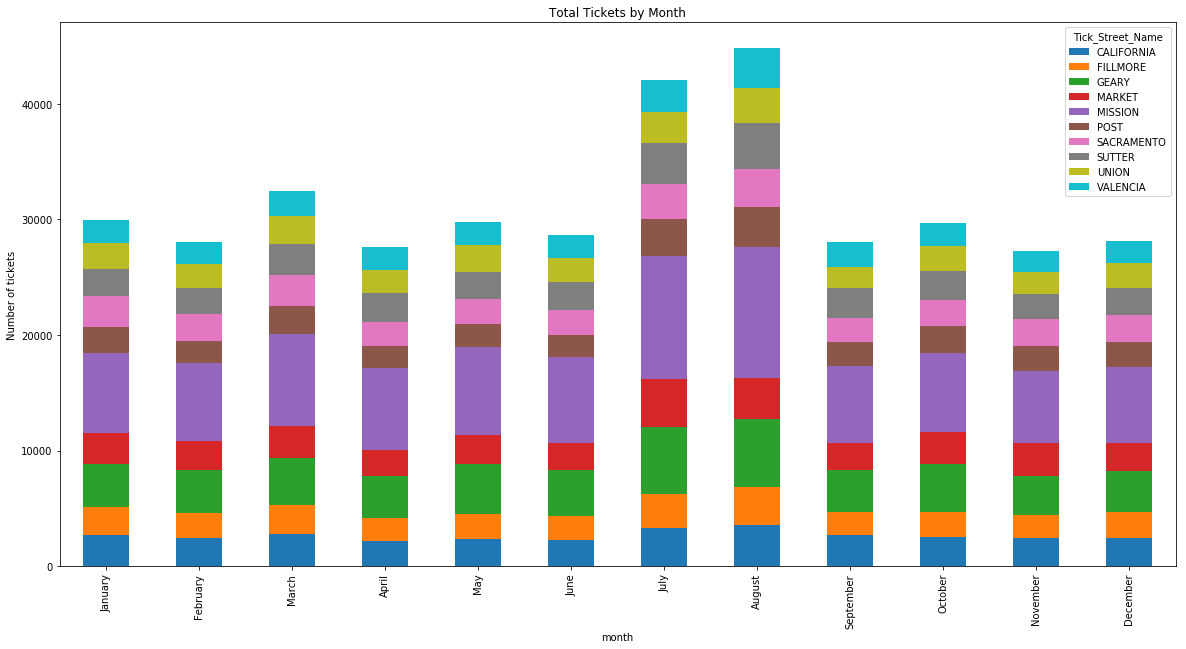

In [31]:
months = {1.0:'January', 2.0:'February', 3.0:'March', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 
       8.0:'August', 9.0:'September', 10.0:'October', 11.0:'November', 12.0:'December'}
pivot_df['month'] = pivot_df['month'].map(months)
pivot_df.plot( x= 'month', kind = 'bar', figsize = (20, 10), stacked = True)
plt.title('Total Tickets by Month')
plt.ylabel('Number of tickets') 

## Extra Exploration

## Total Tickets by Violation Type

Text(0.5, 0, 'Violation Type')

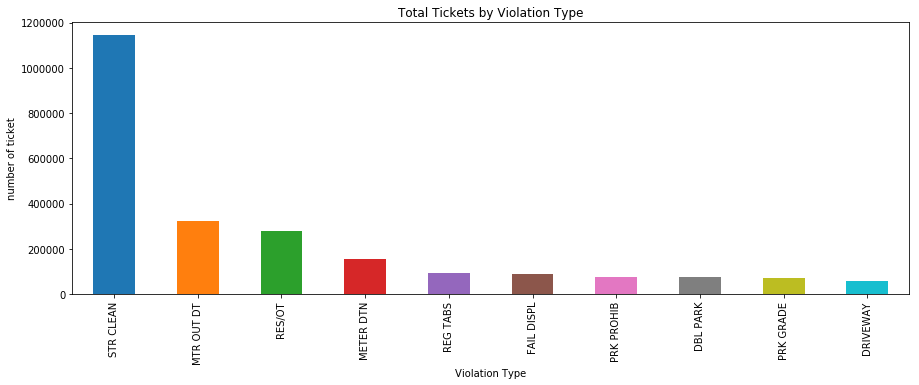

In [44]:
ax = new_parkticket['Violation_Desc'].value_counts().nlargest(10).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Violation Type')
plt.ylabel('number of ticket')
plt.xlabel('Violation Type')

## Total Tickets by Vehicle Make

Text(0.5, 0, 'Vehicle Make')

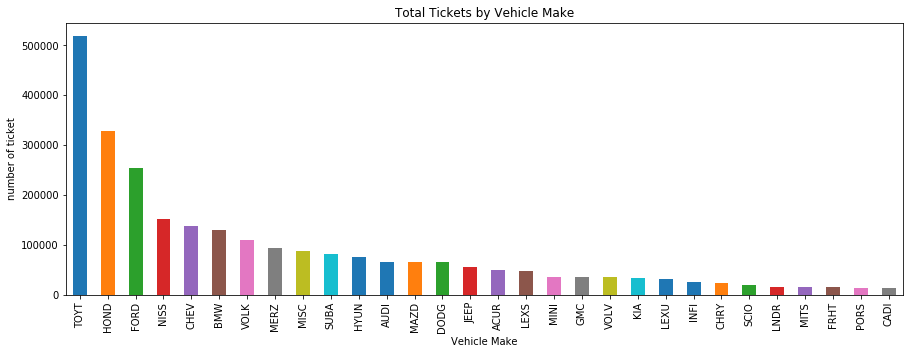

In [46]:
#Most common vehicle makes
ax = new_parkticket['Veh_Make'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Vehicle Make')
plt.ylabel('number of ticket')
plt.xlabel('Vehicle Make')

## Total Tickets by Street_number

Text(0.5, 0, 'Street_Name')

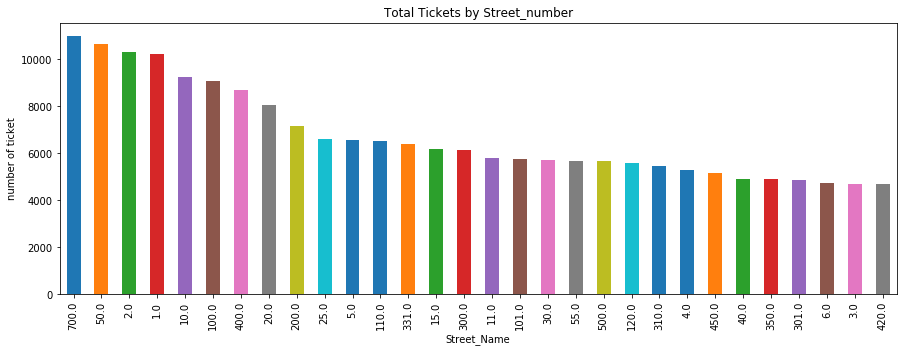

In [49]:
#Most common street_number
ax = new_parkticket['Tick_Street_No'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Street_number')
plt.ylabel('number of ticket')
plt.xlabel('Street_Name')

## Total Tickets by Day, By Violation Desc

In [74]:
new_parkticket['Weekday1'] = timestamp[:80000].dt.dayofweek
type_by_dow = new_parkticket[new_parkticket['Violation_Desc'].isin(new_parkticket['Violation_Desc'].value_counts()[:10].index.tolist())]
pivot_df = type_by_dow.groupby(['Weekday1', 'Violation_Desc'])['Weekday1'].count().unstack('Violation_Desc').fillna(0).reset_index()

Text(0, 0.5, 'number of tickets')

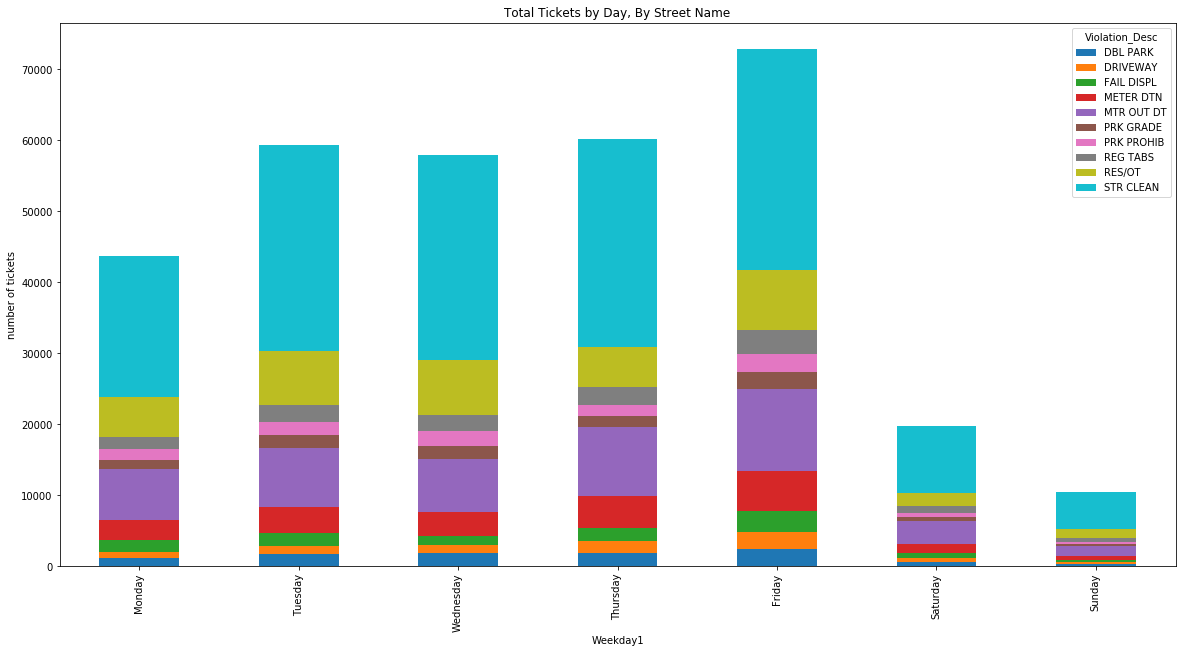

In [75]:
days = {6.0:'Sunday', 0.0:'Monday', 1.0:'Tuesday', 2.0:'Wednesday', 3.0:'Thursday', 4.0:'Friday', 5.0:'Saturday'}
pivot_df['Weekday1'] = pivot_df['Weekday1'].map(days)
pivot_df.plot( x= 'Weekday1', kind = 'bar', figsize = (20, 10), stacked = True)
plt.title('Total Tickets by Day, By Violation Desc')
plt.ylabel('number of tickets')  

Text(0.5, 0, 'Ticket_Issue_Time')

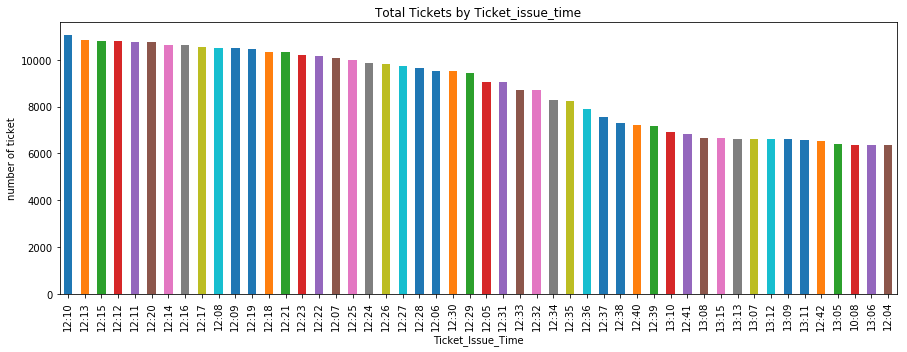

In [9]:
#Ticket_Issue Time

ax = new_parkticket['Tick_Issue_Time'].value_counts()[:50].plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Ticket_issue_time')
plt.ylabel('number of ticket')
plt.xlabel('Ticket_Issue_Time')

Text(0.5, 0, 'Stret_Name')

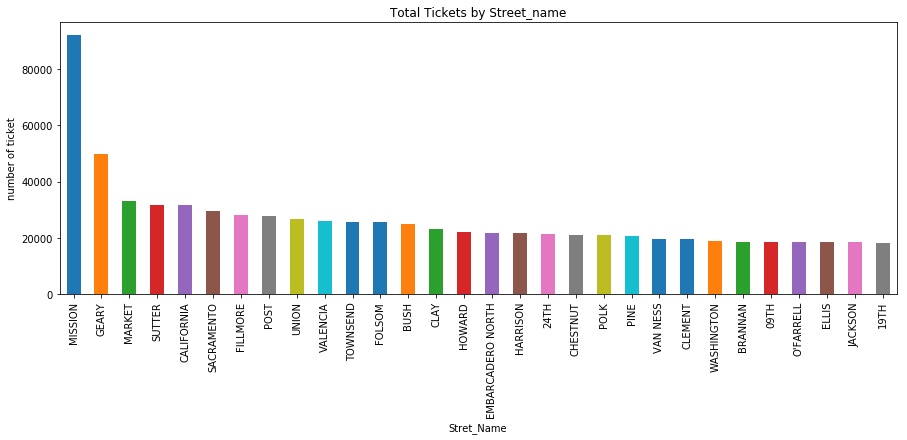

In [10]:
#Street name 

ax = new_parkticket['Tick_Street_Name'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Street_name')
plt.ylabel('number of ticket')
plt.xlabel('Stret_Name')